In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#importando dados para um DataFrame
df = pd.read_csv("/content/drive/My Drive/Suicidio Brasil/master.csv")
print("Formato do DataFrame: ", df.shape)
df.head()

Formato do DataFrame:  (27820, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [8]:
#extrair dados relacionados ao Brasil
df_brasil = df[df.country == "Brazil"].copy()
print("Formato do DataFrame: ", df_brasil.shape)
df_brasil.head()

Formato do DataFrame:  (372, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X


In [9]:
#verificar isoladamente os DataFrames do Brasil e o Mundial para realizar comparação futura
print("--> Mundial:")
display(df.isnull().sum())

print("\n", "--." * 10, "\n")

print("--> Brasil:")
display(df_brasil.isnull().sum())

--> Mundial:


country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


 --.--.--.--.--.--.--.--.--.--. 

--> Brasil:


country                 0
year                    0
sex                     0
age                     0
suicides_no             0
population              0
suicides/100k pop       0
country-year            0
HDI for year          252
 gdp_for_year ($)       0
gdp_per_capita ($)      0
generation              0
dtype: int64

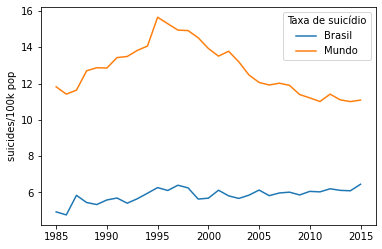

In [10]:
#media mundial e do Brasil em suicidios
years = df_brasil.year.unique()    # pegar os anos para o eixo x
suicides_brasil_mean = df_brasil.groupby('year')['suicides/100k pop'].mean()
suicides_world_mean = df.groupby('year')['suicides/100k pop'].mean()

#2016 não está disponível no DataFrame Brasil
suicides_world_mean.drop(2016, inplace=True)

# plotar comparativo
ax = sns.lineplot(x=years, y=suicides_brasil_mean, label='Brasil')
ax = sns.lineplot(x=years, y=suicides_world_mean, label='Mundo')
plt.legend(title="Taxa de suicídio")
plt.show()

In [11]:
#criar uma tabela dinâmica
table = pd.pivot_table(df_brasil, values='suicides_no', index=['year'], columns=['age'])

#ordem crescente
column_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
table = table.reindex(column_order, axis=1)
table.head()

age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
year,,,,,,
1985,38.0,470.5,530.0,653.5,341.5,80.5
1986,31.0,508.0,505.5,651.0,372.0,68.0
1987,33.5,502.0,565.5,724.5,422.0,88.5
1988,30.0,472.0,557.5,724.0,356.0,93.5
1989,31.5,491.5,569.0,692.5,354.5,92.5


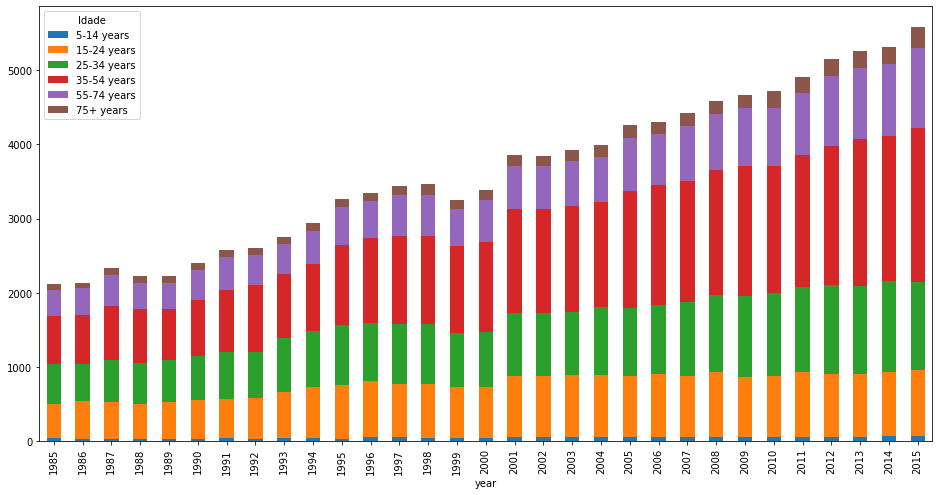

In [12]:
#plotar a pivot table das faixas etárias
table.plot.bar(stacked=True, figsize=(16,8))
plt.legend(title="Idade");

In [13]:
#suicídios por faixa etária
table[['25-34 years']].loc[2015]
table.loc[2015] / table.loc[2015].sum()

age
5-14 years     0.012094
15-24 years    0.159993
25-34 years    0.211681
35-54 years    0.371585
55-74 years    0.194571
75+ years      0.050076
Name: 2015, dtype: float64

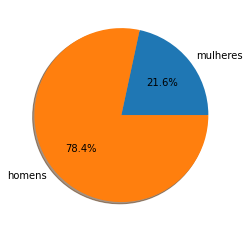

In [14]:
#valores entre homens e mulheres
homens_mulheres = df_brasil.groupby('sex').suicides_no.sum() / df_brasil.groupby('sex').suicides_no.sum().sum()

#gráfico de pizza
plt.pie(homens_mulheres, labels=['mulheres', 'homens'], autopct='%1.1f%%', shadow=True);

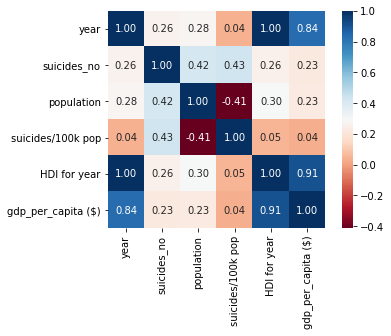

In [15]:
#plotar heatmap
corr = df_brasil.corr()
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);